# Ion Beam Deposition Formula

The on-target power density $I(t)$ of an ion beam with a Maxwell-Boltzmann energy distribution can be expressed as:

$$
I(t) = \frac{8}{3\sqrt{\pi}} \left( \frac{W}{\tau} \right) \left( \frac{\tau}{t} \right)^6 \exp\left(-\frac{\tau}{t}\right)^2 \frac{4}{\pi \phi_{\mathrm{FWHM}}^2},
$$

where:

$$
\tau = \frac{d}{\sqrt{2T/m_i}}\approx \frac{72 \cdot d (\mu m)}{\sqrt{T (\mathrm{MeV})}} \, \mathrm{ps},
$$

### Parameters:
- $W$: Total energy of the ion beam.
- $T$: Temperature of the ion beam.
- $d$: Distance from the ion source to the target.
- $\phi_{\mathrm{FWHM}}$: Full-Width-Half-Maximum (FWHM) size of the ion beam at the target.
- $m_i$: Mass of the ion species.

### Reference
- Temporal, M., Honrubia, J. J. & Atzeni, S. Numerical study of fast ignition of ablatively imploded deuterium–tritium fusion capsules by ultra-intense proton beams. Physics of Plasmas 9, 3098–3107 (2002).



In [239]:
import numpy as np
from skimage.measure import label


def ion_beam_power_density(t_ps, W, T, phi_FWHM, d, A=1):
    """
    Calculate the power density I(t) of an ion beam.

    Parameters:
    t_ps (float): Time in picoseconds (ps)
    W (float): Total energy of the ion beam (J)
    T (float): Temperature of the ion beam (MeV)
    phi_FWHM (float): Full-Width-Half-Maximum size of the ion beam at the target (µm)
    d (float): Distance from the ion source to the target (µm)
    A (int, optional): Mass number of the ion (default is 1 for proton)

    Returns:
    float: Power density I(t) in TW/cm^2
    """
    # Constants
    m_p = 1.67262e-27  # Proton mass in kg
    MeV_to_J = 1.60218e-13  # Conversion factor from MeV to J
    um_to_m = 1e-6  # Conversion factor from µm to m
    ps_to_s = 1e-12  # Conversion factor from ps to s

    # Calculate ion mass based on mass number A
    m_i = A * m_p  # Ion mass in kilograms

    # Convert input units to SI
    T_J = T * MeV_to_J  # Convert temperature from MeV to Joules
    d_m = d * um_to_m  # Convert distance from µm to meters
    phi_FWHM_m = phi_FWHM * um_to_m  # Convert FWHM from µm to meters
    t_s = t_ps * ps_to_s  # Convert time from ps to seconds

    # Calculate the characteristic time scale tau (s)
    tau = d_m / np.sqrt(2 * T_J / m_i)

    # Calculate the power density I(t) in W/m^2
    I_t = (8 / (3 * np.sqrt(np.pi))) * (W / tau) * (tau / t_s)**6 * np.exp(-(tau / t_s)**2) * (4 / (np.pi * phi_FWHM_m**2))

    # Convert from W/m^2 to TW/cm^2
    I_t_TW_cm2 = I_t * 1e-16

    return I_t_TW_cm2

def generate_nonuniform_time(intervals, total_points, point_ratios):
    """
    Generate a non-uniformly distributed time array over multiple intervals.

    Parameters:
    intervals (list of floats): Boundaries of the intervals [x1, x2, ..., xn].
                                Must be in ascending order.
    total_points (int): Total number of points to distribute across all intervals.
    point_ratios (list of floats): Ratios of points in each interval, corresponding to intervals.
                                   Ratios will be normalized automatically.

    Returns:
    np.ndarray: Non-uniformly distributed time array.
    """
    if len(intervals) - 1 != len(point_ratios):
        raise ValueError("The number of point ratios must be one less than the number of interval boundaries.")
    
    if total_points <= 0:
        raise ValueError("Total points must be greater than 0.")
    
    # Normalize point_ratios so their sum is 1
    normalized_ratios = np.array(point_ratios) / np.sum(point_ratios)

    # Calculate the number of points for each interval
    interval_points = (normalized_ratios * total_points).astype(int)

    # Ensure the total number of points matches total_points by adjusting the largest interval
    interval_points[-1] += total_points - np.sum(interval_points)

    # Generate the time array for each interval
    time = []
    for i in range(len(intervals) - 1):
        start, end = intervals[i], intervals[i + 1]
        points = interval_points[i]
        time.extend(np.linspace(start, end, points, endpoint=False))  # Avoid duplicate at interval boundaries

    # Add the final boundary point to the array
    time.append(intervals[-1])

    return np.array(time)



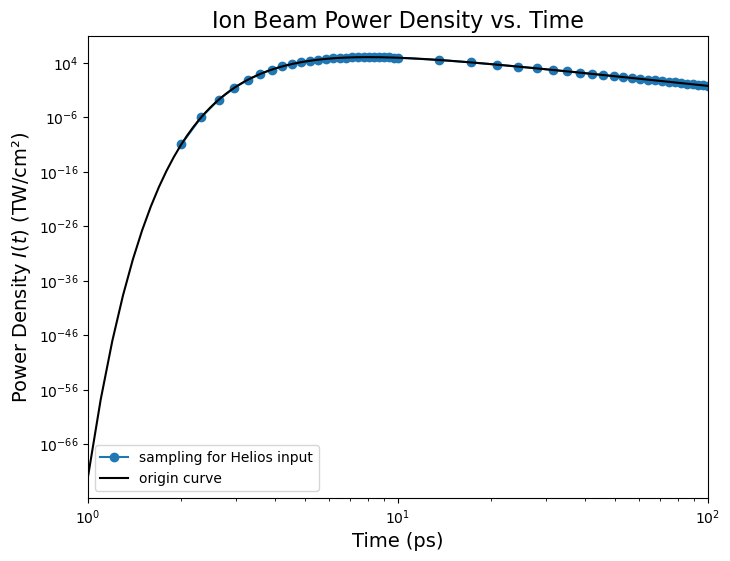

In [237]:
import matplotlib.pyplot as plt

# Example usage
# Parameters (example values)
A = 1
W = 15  # Total energy in Joules
T = 5  # Temperature in MeV
phi_FWHM = 50  # FWHM in µm
d = 430  # Distance in µm

# Time range for plotting
# Parameters
intervals = [2, 10, 100]  # Define the boundaries of the intervals
total_points = 50  # Total number of points
point_ratios = [1, 1]  # Ratios of points in each interval

# Generate the non-uniform time array
time = generate_nonuniform_time(intervals, total_points, point_ratios)


time1 = np.linspace(1, 100, 1000)  # Time in picoseconds (1 ps to 100 ps)
time2 = np.linspace(1, 100, 50)  # Time in picoseconds (1 ps to 100 ps)

# Calculate I(t) for all time points
I_t_values = [ion_beam_power_density(t, W, T, phi_FWHM, d, A = 1) for t in time]
I_t_values1 = [ion_beam_power_density(t, W, T, phi_FWHM, d,A = 1) for t in time1]
I_t_values2 = [ion_beam_power_density(t, W, T, phi_FWHM, d,A = 1) for t in time2]

# Plot I(t)
plt.figure(figsize=(8, 6))
  # Convert time to picoseconds for plotting

# plt.plot(time2, I_t_values2,marker = 's',c = 'r', label= 'uniformly sampling')
plt.plot(time , I_t_values,marker = 'o',label = "sampling for Helios input")
plt.plot(time1, I_t_values1,c = 'k', label= 'origin curve')


plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Power Density $I(t)$ (TW/cm²)', fontsize=14)
plt.title('Ion Beam Power Density vs. Time', fontsize=16)

plt.yscale('log')
plt.xscale('log')
plt.xlim(1,100) 
# plt.ylim(bottom = 1e-1, top = 1e6) 
# plt.grid(True)
plt.legend()

plt.show()


In [197]:
output_data = np.column_stack((time*1e-12, I_t_values))
output_filepath = "/Users/zhaoxu/Desktop/testdata/ion_beam_data_new.txt"
np.savetxt(output_filepath, output_data, header="Time (ps)\tI(t) (TW/cm^2)", fmt="%.6e", delimiter="\t")

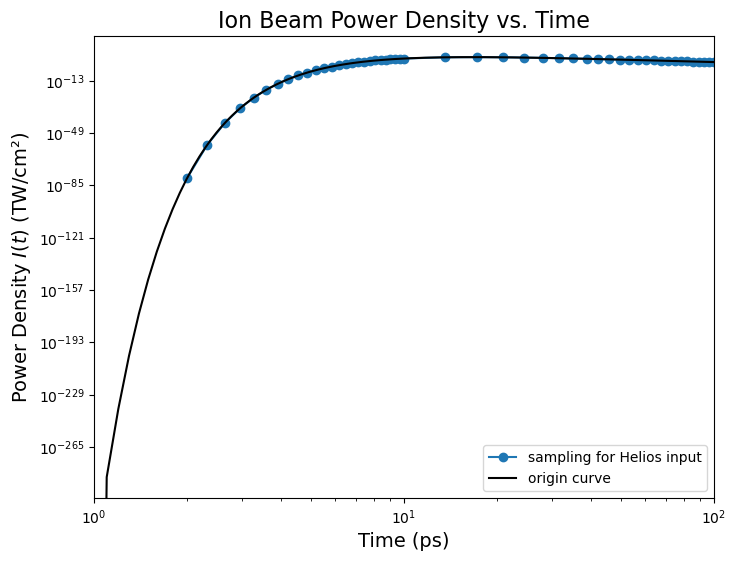

In [238]:
# Example usage
# Parameters (example values)
A = 12
W = 4.2  # Total energy in Joules
T = 14  # Temperature in MeV
phi_FWHM = 150  # FWHM in µm
d = 430  # Distance in µm

# Time range for plotting
# Parameters
intervals = [2, 10, 100]  # Define the boundaries of the intervals
total_points = 50  # Total number of points
point_ratios = [1, 1]  # Ratios of points in each interval

# Generate the non-uniform time array
time = generate_nonuniform_time(intervals, total_points, point_ratios)


time1 = np.linspace(1, 100, 1000)  # Time in picoseconds (1 ps to 100 ps)
time2 = np.linspace(1, 100, 50)  # Time in picoseconds (1 ps to 100 ps)

# Calculate I(t) for all time points
I_t_values = [ion_beam_power_density(t, W, T, phi_FWHM, d,A = 12) for t in time]
I_t_values1 = [ion_beam_power_density(t, W, T, phi_FWHM, d,A = 12) for t in time1]
I_t_values2 = [ion_beam_power_density(t, W, T, phi_FWHM, d,A = 12) for t in time2]

# Plot I(t)
plt.figure(figsize=(8, 6))
  # Convert time to picoseconds for plotting

# plt.plot(time2, I_t_values2,marker = 's',c = 'r', label= 'uniformly sampling')
plt.plot(time , I_t_values,marker = 'o',label = "sampling for Helios input")
plt.plot(time1, I_t_values1,c = 'k', label= 'origin curve')


plt.xlabel('Time (ps)', fontsize=14)
plt.ylabel('Power Density $I(t)$ (TW/cm²)', fontsize=14)
plt.title('Ion Beam Power Density vs. Time', fontsize=16)

plt.yscale('log')
plt.xscale('log')
plt.xlim(1,100) 
# plt.ylim(bottom = 1e-1, top = 1e6) 
# plt.grid(True)
plt.legend()

plt.show()


In [235]:
output_data = np.column_stack((time*1e-12, I_t_values))
output_filepath = "/Users/zhaoxu/Desktop/testdata/C_ion_beam_data.txt"
np.savetxt(output_filepath, output_data, header="Time (ps)\tI(t) (TW/cm^2)", fmt="%.6e", delimiter="\t")

In [236]:
487.27+18.35+8.3+8.26+5.6+18.4+12.37+22.6+3+13.2+2.82+11.3+8.77+19.5+4.99+2

646.73